In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# test数据比train少一列survived

In [ ]:
# 将train和test数据合并观察
full_data = train.append(test,ignore_index=True)
display(full_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 查看full_data的详细情况
# 注意处理一下异常值
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
# 可以观察到有一些数据存在缺失

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

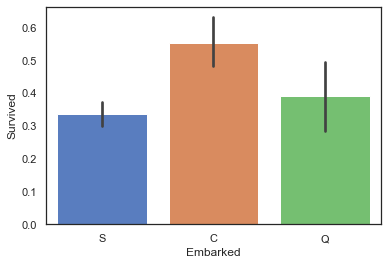

In [12]:
# 绘制登船港口和生存，之间的关系图
sns.barplot(data=train,x='Embarked',y='Survived')

In [ ]:
# 计算不同类型Embarked乘客的生存率
s = full_data.groupby('Embarked')['Survived'].value_counts().to_frame() # 所有乘客的数据用Embarked进行分组，分别展示其生存率
display(s)

Survived
Embarked Survived          
C        1.0             93
         0.0             75
Q        0.0             47
         1.0             30
S        0.0            427
         1.0            217

In [ ]:
s2 = s/s.sum(level=0) # 计算每个Embarked的生存率和死亡率
display(s2)

Survived
Embarked Survived          
C        1.0       0.553571
         0.0       0.446429
Q        0.0       0.610390
         1.0       0.389610
S        0.0       0.663043
         1.0       0.336957

In [ ]:
pd.merge(s,s2,left_index=True,right_index=True,suffixes=['_num','_rate']) # 整体集成展示

Survived_num  Survived_rate
Embarked Survived                             
C        1.0                 93       0.553571
         0.0                 75       0.446429
Q        0.0                 47       0.610390
         1.0                 30       0.389610
S        0.0                427       0.663043
         1.0                217       0.336957

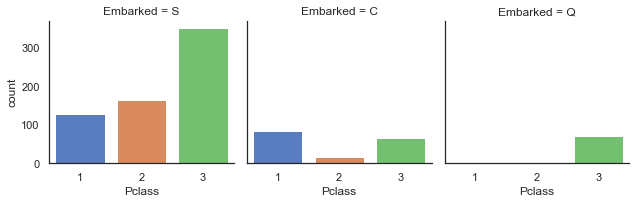

In [17]:
sns.catplot('Pclass',col='Embarked',data=train,kind='count',size=3)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

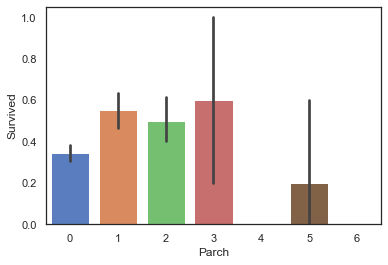

In [18]:
sns.barplot(data=train,x='Parch',y='Survived') # 绘制亲人数量和生存，之间的关系

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

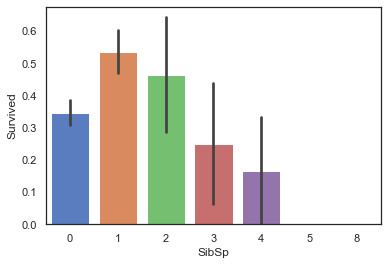

In [ ]:
# 兄弟姐妹数量和生存率之间的关系
sns.barplot(data=train,x='SibSp',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

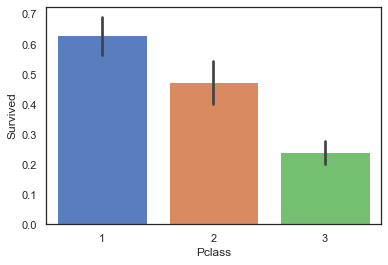

In [21]:
# 舱位等级和生存率之间的关系
sns.barplot(data=train,x='Pclass',y='Survived')

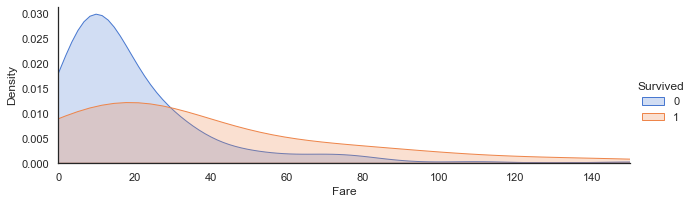

In [24]:
# 消费和生存率之间的关系

# 创建一个 FacetGrid 网格对象，用来绘图。
# aspect是每个图形的横纵比
# hue='Survived'：按 Survived 列分类
ageFacet = sns.FacetGrid(train,hue='Survived',aspect=3) 

# 在 FacetGrid 上映射 sns.kdeplot，对 Fare（票价）这一列画核密度估计图（KDE）。
# 绘制的是概论密度曲线图
ageFacet.map(sns.kdeplot,'Fare',shade=True)

# 设置 X 轴的范围在 0 到 150 之间
ageFacet.set(xlim=(0,150))

# 添加图例
ageFacet.add_legend()

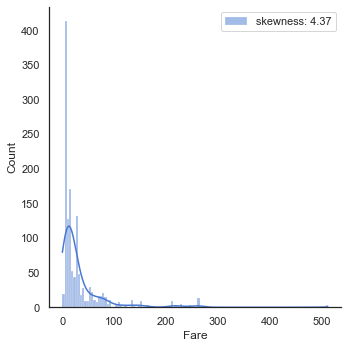

In [ ]:
# 查看Fare的分布情况
farePlot = sns.displot(
    full_data['Fare'].dropna(), # 获取票价列并剔除缺失值（NaN）
    kde=True, # 还画一条 核密度估计曲线（KDE），可视化分布形状
    label='skewness: %.2f' % full_data['Fare'].skew() # 计算 Fare 的偏度（skewness），保留两位小数
)
farePlot.ax.legend(loc='best')

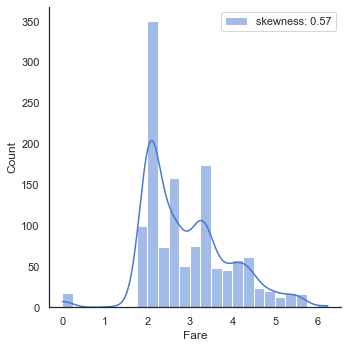

In [ ]:
# 对于偏度很大的数据可以使用对数化处理

# 对数化处理Fare值
full_data['Fare'] = full_data['Fare'].map(lambda x : np.log(x) if x > 0 else x)

# 处理之后的Fare分布
farePlot = sns.displot(
    full_data['Fare'].dropna(),
    kde = True,
    label = 'skewness: %.2f' % full_data['Fare'].skew()
)
farePlot.ax.legend(loc='best')

数据预处理

In [34]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [35]:
# 使用Unknown填充缺失的Carbin值

full_data['Cabin'] = full_data['Cabin'].fillna('Unknown')
full_data['Cabin'].head()

0    Unknown
1        C85
2    Unknown
3       C123
4    Unknown
Name: Cabin, dtype: object

In [36]:
display(full_data[full_data['Embarked'].isnull()])
display(full_data['Embarked'].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# 可知在S口岸登船的旅客最多,填充成S
full_data['Embarked'] = full_data['Embarked'].fillna('S')

In [40]:
display(full_data[full_data['Fare'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S


In [41]:
# 利用Pclass，Embarked，Cabin的平均值来填充
price = full_data[
    (full_data['Pclass']==3) &
    (full_data['Embarked']=='S') &
    (full_data['Cabin']=='Unknown')
    ]['Fare'].mean()
full_data['Fare'] = full_data['Fare'].fillna(price)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


特征工程

In [42]:
# 从旅客姓名的头衔中获得其身份

# 创建新特征Title
full_data['Title'] = full_data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())

# 查看Title的数据分布
full_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [ ]:
# 在杂乱的Title中获得6种主要身份

TitleDict = {}
TitleDict['Mr'] = 'Mr'
TitleDict['Miss'] = 'Miss'
TitleDict['Mrs'] = 'Mrs'
TitleDict['Master'] = 'Master'
TitleDict['Rev'] = 'Officer'
TitleDict['Dr'] = 'Officer'
TitleDict['Col'] = 'Officer'
TitleDict['Mlle'] = 'Miss'
TitleDict['Major'] = 'Officer'
TitleDict['Ms'] = 'Mrs'
TitleDict['Lady'] = 'Royalty'
TitleDict['Sir'] = 'Royalty'
TitleDict['Mme'] = 'Mrs'
TitleDict['Don'] = 'Royalty'
TitleDict['Capt'] = 'Officer'
TitleDict['the Countess'] = 'Royalty'
TitleDict['Jonkheer'] = 'Master'
TitleDict['Dona'] = 'Royalty'

full_data['Title'] = full_data['Title'].map(TitleDict)
full_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

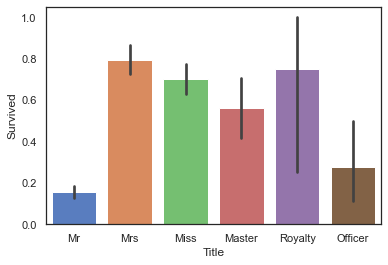

In [44]:
# 可视化Title和Survived之间的关系

sns.barplot(data=full_data,x='Title',y='Survived')